# Pycapacity Four link robot demo notebook

Software dependencies: 
- `pycapacity` - task-space physical ability calculation package
```
pip install pycapacity
```
- `jupyter` to run this notebook
```
pip install jupyter
```
Optional
- `ipympl` and `ipywidgets` for interactive visualisation of plots

```
pip install ipywidgets
pip install ipympl
```

In [1]:
import numpy as np

import pycapacity.robot as capacity # robot capacity module
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex, plot_ellipsoid, plot_polytope  # visualistion tools
import matplotlib.pyplot as plt
import matplotlib

# seed to have the same images 
np.random.seed(1234)

## Four link planar robot example

Force polytope and ellipsoid example calculaton using the newly developed force capacity calculation python module

`n=4` and `m=2`

In [2]:
from pycapacity.examples import FourLinkRobot
robot = FourLinkRobot()

# joint limits 
q_min = -np.ones(4)
q_max = np.ones(4)
# joint torque limits tau
tau_min = -np.ones(4)*1
tau_max = np.ones(4)*1
# joint velocity limits
dq_min = -np.ones(4)
dq_max = np.ones(4)

## Force polytope and manipulability ellipsoid

In [3]:
# joint positions q
q  = np.random.uniform(q_min, q_max)
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))

# jacobian
J = robot.jacobian(q)
# calculate the velocity polytope
f_poly = capacity.force_polytope(J,tau_min,tau_max)

# calculate the velocity ellipsoid
f_ellipsoid = capacity.force_ellipsoid(J, tau_max)

Visual: no faces found, calculating faces


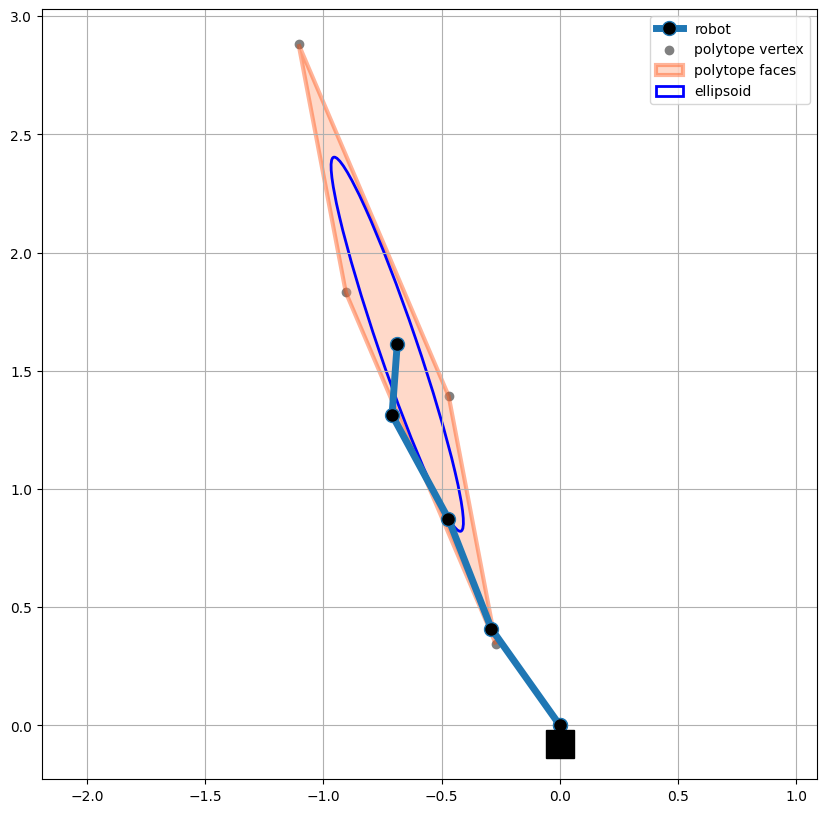

In [4]:
# uncomment for interactive plots
# %matplotlib widget

# visualise polytope ellipsoid
fig = plt.figure(11, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = robot.forward_kinematics(q) 
robot.plot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
              polytope=f_poly,
              center=robot_position, 
              face_color='lightsalmon', 
              edge_color='orangered',
              vertex_color='gray',
              label='polytope', 
              scale=scale)

# plot ellipsoid
plot_ellipsoid(ellipsoid=f_ellipsoid, 
               center=robot_position, 
               plot=fig, 
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0,
               scale=scale)

plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

## Approximation of the robot's reachable space using a convex polytope

In [5]:
# random joint configuration
q  = np.random.uniform(q_min, q_max)
# q = q_min
#q = np.array([0.63305469, 0.67642124, 1.1684918 , 0.22633345])

# jacobian
J = robot.jacobian(q)
# jacobian
M = robot.inertia(q)
# calculate the acceleration polytope
poly_dt1000 = capacity.reachable_space_approximation(J=J, 
                                                      M=M, 
                                                      q0=q, 
                                                      horizon=1,
                                                      t_max=tau_max,
                                                      t_min=tau_min, 
                                                      dq_max=dq_max,
                                                      dq_min=dq_min,
                                                      q_min = q_min,
                                                      q_max = q_max)

poly_dt500 = capacity.reachable_space_approximation(J=J, 
                                                  M=M, 
                                                  q0=q, 
                                                  horizon=0.5,
                                                  t_max=tau_max,
                                                  t_min=tau_min, 
                                                  dq_max=dq_max,
                                                  dq_min=dq_min,
                                                  q_min = q_min,
                                                  q_max = q_max)


Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


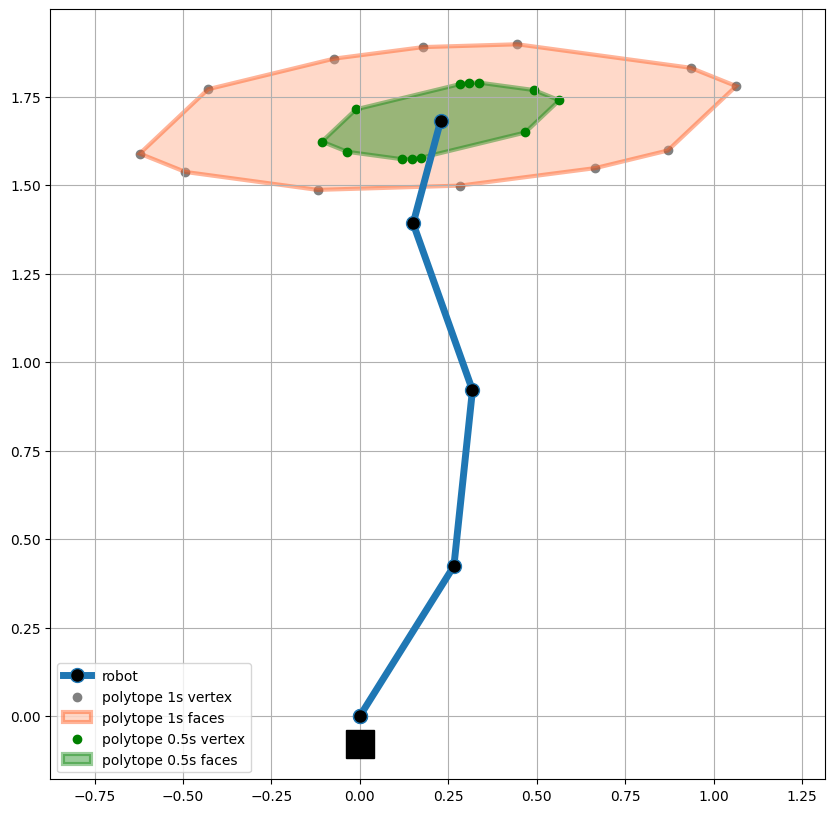

In [6]:
# uncomment for interactive plots
# %matplotlib widget 

# visualise polytope ellipsoid
fig = plt.figure(12, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = robot.forward_kinematics(q) 
robot.plot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
              polytope=poly_dt1000,
              center=robot_position, 
              face_color='lightsalmon', 
              edge_color='orangered',
              vertex_color='gray',
              label='polytope 1s')
plot_polytope(plot=fig,
              polytope=poly_dt500,
              center=robot_position, 
              face_color='green', 
              edge_color='green',
              vertex_color='green',
              label='polytope 0.5s')

plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

## Acceleration polytope and acceleration ellipsoid

In [7]:
# joint positions q
q  = np.random.uniform(q_min, q_max)
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))


# jacobian
J = robot.jacobian(q)
# jacobian
M = robot.inertia(q)

# calculate the acceleration polytope

acc_poly = capacity.acceleration_polytope(J, M, tau_min ,tau_max)

# calculate the acceleration ellipsoid
acc_ellisoid= capacity.acceleration_ellipsoid(J, M, tau_max)

Visual: no faces found, calculating faces


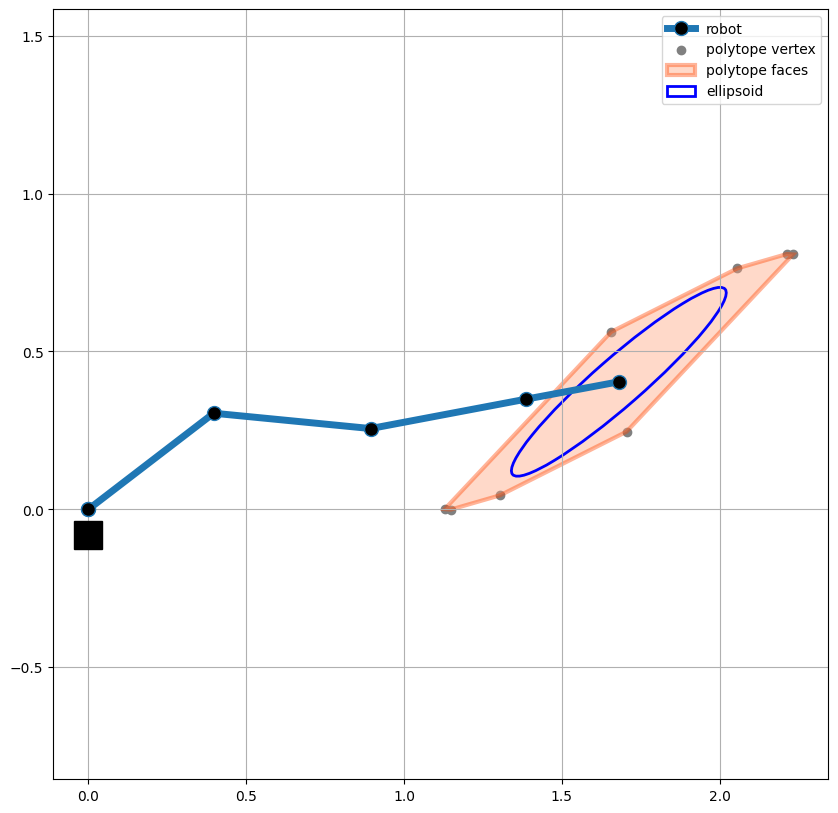

In [8]:
# uncomment for interactive plots
# %matplotlib widget

# visualise polytope ellipsoid
fig = plt.figure(13, figsize=[10,10])

scale = 1/100

#plot the robot
robot_position = robot.forward_kinematics(q) 
robot.plot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
                    polytope=acc_poly,
                    center=robot_position, 
                    face_color='lightsalmon', 
                    edge_color='orangered',
                    vertex_color='gray',
                    label='polytope', 
                    scale=scale)
# plot ellipsoid
plot_ellipsoid(ellipsoid=acc_ellisoid, 
               center=robot_position, 
               plot=fig,
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0, 
               scale=scale)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

## Velocity polytope and manipulability ellipsoid

In [9]:
# joint positions q
q  = np.random.uniform(q_min, q_max)
# joint torque limits tau
dq_min = -np.ones((4,1))
dq_max = np.ones((4,1))


# jacobian
J = robot.jacobian(q)
# calculate the force polytope

vel_poly = capacity.velocity_polytope(J, dq_min ,dq_max)

# calculate the force ellipsoid
vel_ellipsoid = capacity.velocity_ellipsoid(J, dq_max)


Visual: no faces found, calculating faces


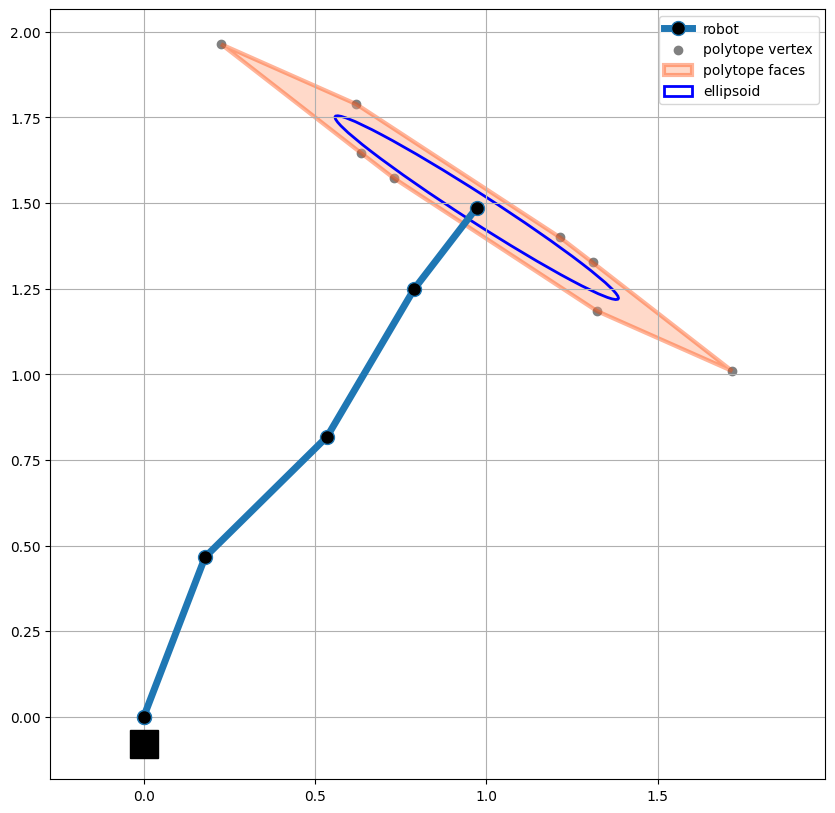

In [10]:
# uncomment for interactive plots
# %matplotlib widget

# visualise polytope ellipsoid
fig = plt.figure(14, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = robot.forward_kinematics(q) 
robot.plot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
                    polytope=vel_poly,
                    center=robot_position, 
                    face_color='lightsalmon', 
                    edge_color='orangered',
                    vertex_color='gray',
                    label='polytope', 
                    scale=scale)
# plot ellipsoid
plot_ellipsoid(ellipsoid=vel_ellipsoid, 
               center=robot_position, 
               plot=fig,
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0, 
               scale=scale)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()